In [2]:
import pandas as pd

In [27]:
file_path = "all_inlinks.csv"

link_data = pd.read_csv(file_path)

C:\Users\Agustin\AppData\Local\Temp\ipykernel_31448\2110782363.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  link_data = pd.read_csv(file_path)


#### Outbound vs Inbound Links

In [13]:
inlink_data = link_data[link_data['Destination'].str.contains(r'https://www.gffoodservice.com.au/', regex=True)]

In [12]:
print(f"Outbound and inbound links are in total:", link_data.shape)
print("Outbound and inbound links are in total:", inlink_data.shape)

Outbound and inbound links are in total: (483779, 15)
Outbound and inbound links are in total: (464766, 15)


In [28]:
inline_types = inlink_data['Type'].value_counts()
inline_types

Type
Hyperlink         440698
JavaScript         16663
Image               3256
XML Sitemap         1777
HTML Canonical      1362
CSS                  443
HTTP Redirect        189
HTML Rel Prev        189
HTML Rel Next        189
Name: count, dtype: int64

##### Checking out external linking

In [ ]:
# 2. Filter destination link to external (non-travelex.com.au) websites
outbound_link_data = link_data[~link_data['Destination'].str.contains(r'https://www.gffoodservice.com.au/', regex=True)]

outbound_link_data.head(5)

,Type,Source,Destination,Size (Bytes),Alt Text,Anchor,Status Code,Status,Follow,Target,Rel,Path Type,Link Path,Link Position,Link Origin
33626,JavaScript,https://www.gffoodservice.com.au/,https://www.googletagmanager.com/gtag/js?id=G-...,0,NaN,NaN,200,OK,True,NaN,NaN,Absolute,//head/script[@id='google_gtagjs-js'],Head,HTML
33627,JavaScript,https://www.gffoodservice.com.au/recipe/slow-c...,https://www.googletagmanager.com/gtag/js?id=G-...,0,NaN,NaN,200,OK,True,NaN,NaN,Absolute,//head/script[@id='google_gtagjs-js'],Head,HTML
33628,JavaScript,https://www.gffoodservice.com.au/recipe/roaste...,https://www.googletagmanager.com/gtag/js?id=G-...,0,NaN,NaN,200,OK,True,NaN,NaN,Absolute,//head/script[@id='google_gtagjs-js'],Head,HTML
33629,JavaScript,https://www.gffoodservice.com.au/recipe/apple-...,https://www.googletagmanager.com/gtag/js?id=G-...,0,NaN,NaN,200,OK,True,NaN,NaN,Absolute,//head/script[@id='google_gtagjs-js'],Head,HTML
33630,JavaScript,https://www.gffoodservice.com.au/recipe/winter...,https://www.googletagmanager.com/gtag/js?id=G-...,0,NaN,NaN,200,OK,True,NaN,NaN,Absolute,//head/script[@id='google_gtagjs-js'],Head,HTML


In [ ]:
outbound_link_data.to_csv("outbound_link_data.csv")
print("File has been imported to 'outbound_link_data.csv'")

File has been imported to 'outlink_data.csv'


#### Status Check

In [17]:
status_check = inlink_data.groupby('Status').size().reset_index(name='Count')

status_check = status_check.sort_values(by='Count', ascending=False)

status_check

,Status,Count
3,OK,463828
2,Not Found,595
1,Moved Permanently,335
0,Found,8


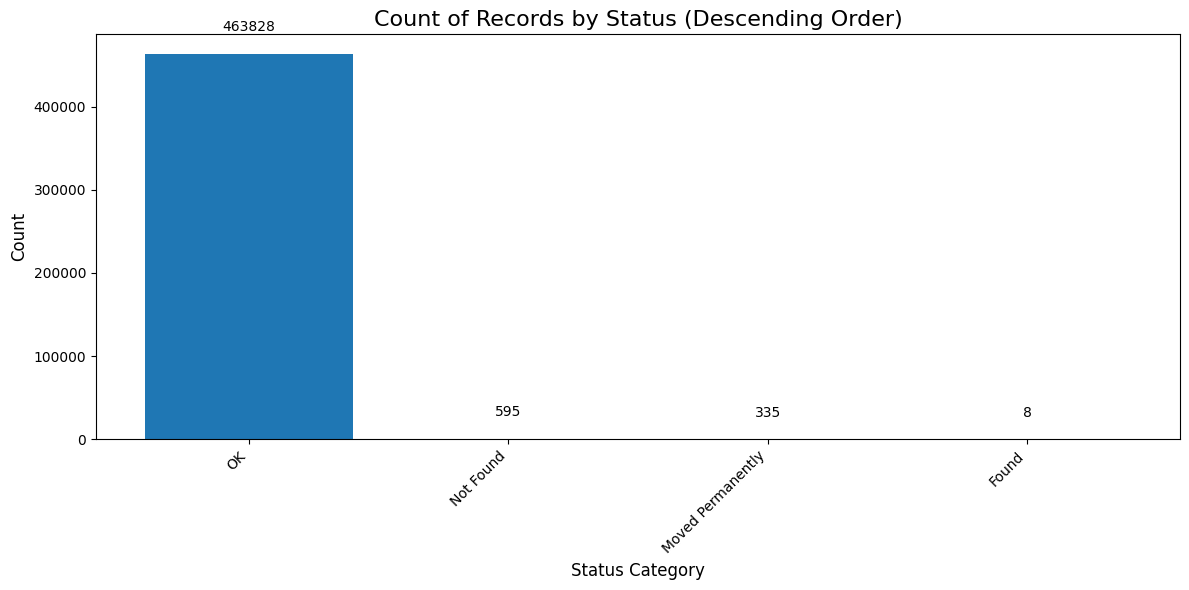

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Create the figure and axes
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability

# 2. Create the bar plot
bars = plt.bar(
    status_check['Status'],
    status_check['Count'],
    color='#1f77b4' # A standard blue color
)

# 3. Add titles and labels
plt.title('Count of Records by Status (Descending Order)', fontsize=16)
plt.xlabel('Status Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 4. Rotate x-axis labels for better fit
plt.xticks(rotation=45, ha='right')

# 5. Add data labels on top of the bars (optional but helpful)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0, # Center the text
        yval + 0.05 * status_check['Count'].max(), # Position slightly above the bar
        int(yval), # The text content (the count)
        ha='center',
        va='bottom'
    )

# 6. Improve layout and display the plot
plt.tight_layout()
plt.show()

In [20]:
inlink_data.columns

Index(['Type', 'Source', 'Destination', 'Size (Bytes)', 'Alt Text', 'Anchor',
       'Status Code', 'Status', 'Follow', 'Target', 'Rel', 'Path Type',
       'Link Path', 'Link Position', 'Link Origin'],
      dtype='object')

In [21]:
# Step 1: Filter out rows with Status Code = 200
non_ok_data = inlink_data[inlink_data['Status'] != 'OK']

# Step 2: Group the data by 'Type' and 'Status Code'
non_ok_data_grouped_data = non_ok_data.groupby(['Type', 'Status'])


In [24]:
non_ok_data_grouped_data.head(1)

,Type,Source,Destination,Size (Bytes),Alt Text,Anchor,Status Code,Status,Follow,Target,Rel,Path Type,Link Path,Link Position,Link Origin
125369,Hyperlink,https://www.gffoodservice.com.au/,https://www.gffoodservice.com.au/oli_and_vine_...,0,New Benchmark,NaN,301,Moved Permanently,True,NaN,NaN,Absolute,//body/div[@id='wrapper']/section/div[@class='...,Content,HTML
389116,Hyperlink,https://www.gffoodservice.com.au/recipe/slow-c...,https://www.gffoodservice.com.au/bakery-ingred...,0,NaN,salt,404,Not Found,True,NaN,NaN,Absolute,//body/div[@id='wrapper']/div/div/div/main/div...,Content,HTML
389559,HTTP Redirect,https://www.gffoodservice.com.au/products/mayo...,https://www.gffoodservice.com.au/mayonnaise/,0,NaN,NaN,404,Not Found,True,NaN,NaN,Absolute,NaN,NaN,HTTP
460831,HTTP Redirect,https://www.gffoodservice.com.au/product/prais...,https://www.gffoodservice.com.au/product/prais...,0,NaN,NaN,301,Moved Permanently,True,NaN,NaN,Absolute,NaN,NaN,HTTP
481069,HTTP Redirect,https://www.gffoodservice.com.au/products/vine...,https://www.gffoodservice.com.au/vinegar/apple...,0,NaN,NaN,302,Found,True,NaN,NaN,Absolute,NaN,NaN,HTTP
481605,Hyperlink,https://www.gffoodservice.com.au/recipe/smoked...,https://www.gffoodservice.com.au/margarine-bak...,0,NaN,wholesale margarine,302,Found,True,NaN,NaN,Absolute,//body/div[@id='wrapper']/div/div/div/main/div...,Content,HTML
483517,XML Sitemap,https://www.gffoodservice.com.au/kadence_eleme...,https://www.gffoodservice.com.au/?kadence_elem...,0,NaN,NaN,301,Moved Permanently,True,NaN,NaN,Absolute,NaN,NaN,Sitemap XML


#### Internal Links by Status Code

In [25]:
import seaborn as sns

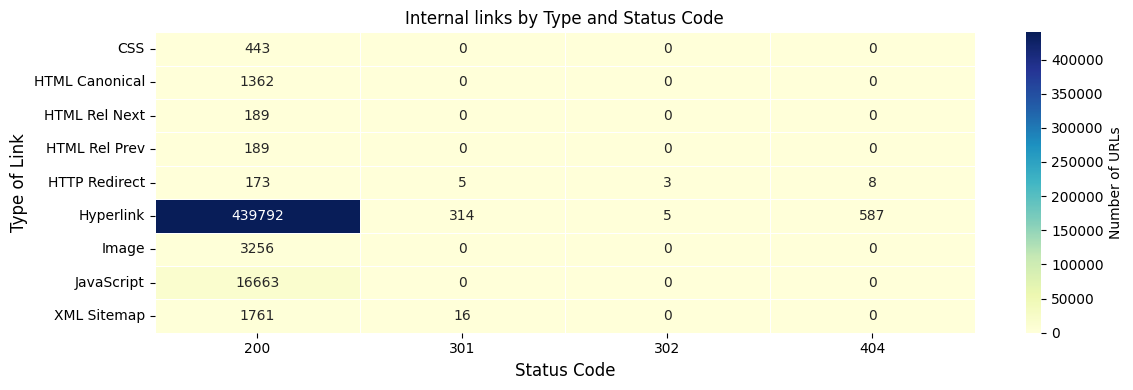

In [26]:
# Create a Dataframe with the number of URLs grouped byt Type and Status Code
grouped_data = inlink_data.groupby(['Type', 'Status Code']).size().reset_index(name='Count')

# pivot the data for the heatmap
heatmap_data = grouped_data.pivot(index='Type', columns='Status Code', values='Count').fillna(0)

# create sitemap
plt.figure(figsize=(12, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label':'Number of URLs'}
)

# Add labels and title
plt.title('Internal links by Type and Status Code')
plt.xlabel('Status Code', fontsize=12)
plt.ylabel('Type of Link',fontsize=12)

# display the heatmap
plt.tight_layout()
plt.show()

In [29]:
# Step 1: Filter out rows with Status Code = 200
non_200_data = link_data[link_data['Status Code'] != 200]

# Step 2: Group the data by 'Type' and 'Status Code'
grouped_data = non_200_data.groupby(['Type', 'Status Code'])

# Step 3: Iterate through each group and export to separate CSV files
for (link_type, status_code), group in grouped_data:
    # Create a filename based on the link type and status code
    file_name = f"{link_type.replace(' ', '_')}_status_{status_code}_urls.csv"
    
    # Export the group to a CSV file
    group[['Type', 'Source', 'Destination','Alt Text','Anchor', 'Status Code']].to_csv(file_name, index=False)
    print(f"Exported {len(group)} URLs for {link_type} + Status Code {status_code} to {file_name}")

Exported 9 URLs for HTML Canonical + Status Code 0 to HTML_Canonical_status_0_urls.csv
Exported 11 URLs for HTML Rel Prev + Status Code 301 to HTML_Rel_Prev_status_301_urls.csv
Exported 5 URLs for HTTP Redirect + Status Code 301 to HTTP_Redirect_status_301_urls.csv
Exported 3 URLs for HTTP Redirect + Status Code 302 to HTTP_Redirect_status_302_urls.csv
Exported 8 URLs for HTTP Redirect + Status Code 404 to HTTP_Redirect_status_404_urls.csv
Exported 33 URLs for Hyperlink + Status Code 0 to Hyperlink_status_0_urls.csv
Exported 543 URLs for Hyperlink + Status Code 301 to Hyperlink_status_301_urls.csv
Exported 14 URLs for Hyperlink + Status Code 302 to Hyperlink_status_302_urls.csv
Exported 1 URLs for Hyperlink + Status Code 303 to Hyperlink_status_303_urls.csv
Exported 5 URLs for Hyperlink + Status Code 307 to Hyperlink_status_307_urls.csv
Exported 16 URLs for Hyperlink + Status Code 308 to Hyperlink_status_308_urls.csv
Exported 1 URLs for Hyperlink + Status Code 401 to Hyperlink_status_4

In [30]:
import os

# Create the directory if it doesn't exist
output_folder = "inlink_exports"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Step 1: Filter out rows with Status Code = 200
non_200_data = link_data[link_data['Status Code'] != 200]

# Step 2: Group the data by 'Type' and 'Status Code'
grouped_data = non_200_data.groupby(['Type', 'Status Code'])

# Step 3: Iterate through each group and export to separate CSV files
for (link_type, status_code), group in grouped_data:
    # Create a filename based on the link type and status code
    file_name = f"{link_type.replace(' ', '_')}_status_{status_code}_urls.csv"
    
    # Create the full path by joining the folder name and file name
    file_path = os.path.join(output_folder, file_name)
    
    # Export the group to a CSV file inside the new folder
    group[['Type', 'Source', 'Destination','Alt Text','Anchor', 'Status Code']].to_csv(file_path, index=False)
    
    print(f"Exported {len(group)} URLs to {file_path}")

Exported 9 URLs to inlink_exports\HTML_Canonical_status_0_urls.csv
Exported 11 URLs to inlink_exports\HTML_Rel_Prev_status_301_urls.csv
Exported 5 URLs to inlink_exports\HTTP_Redirect_status_301_urls.csv
Exported 3 URLs to inlink_exports\HTTP_Redirect_status_302_urls.csv
Exported 8 URLs to inlink_exports\HTTP_Redirect_status_404_urls.csv
Exported 33 URLs to inlink_exports\Hyperlink_status_0_urls.csv
Exported 543 URLs to inlink_exports\Hyperlink_status_301_urls.csv
Exported 14 URLs to inlink_exports\Hyperlink_status_302_urls.csv
Exported 1 URLs to inlink_exports\Hyperlink_status_303_urls.csv
Exported 5 URLs to inlink_exports\Hyperlink_status_307_urls.csv
Exported 16 URLs to inlink_exports\Hyperlink_status_308_urls.csv
Exported 1 URLs to inlink_exports\Hyperlink_status_401_urls.csv
Exported 29 URLs to inlink_exports\Hyperlink_status_403_urls.csv
Exported 608 URLs to inlink_exports\Hyperlink_status_404_urls.csv
Exported 1 URLs to inlink_exports\Hyperlink_status_410_urls.csv
Exported 7 URL